In [19]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load data
iris = pd.read_csv("iris.csv")

In [21]:
# Checking if the data loaded correctly
display(iris)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
# Dispaly information about column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We don't have any NaN columns, and all columns contain data of the correct type

In [23]:
# Displaying basic statistical data for each type of iris
print("Setosa")
display(iris[iris["variety"]=="Setosa"].describe())
print("Versicolor")
display(iris[iris["variety"]=="Versicolor"].describe())
print("Virginica")
display(iris[iris["variety"]=="Virginica"].describe())

Setosa


,sepal.length,sepal.width,petal.length,petal.width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


Versicolor


,sepal.length,sepal.width,petal.length,petal.width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Virginica


,sepal.length,sepal.width,petal.length,petal.width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [24]:
# Preparing the data for the chart

# Setosa
x_setosa_sepal_length = iris[iris["variety"] == "Setosa"]["sepal.length"]
y_setosa_sepal_width = iris[iris["variety"] == "Setosa"]["sepal.width"]
x_setosa_petal_length = iris[iris["variety"] == "Setosa"]["petal.length"]
y_setosa_petal_width = iris[iris["variety"] == "Setosa"]["petal.width"]

# Versicolor
x_Versicolor_sepal_length = iris[iris["variety"] == "Versicolor"]["sepal.length"]
y_Versicolor_sepal_width = iris[iris["variety"] == "Versicolor"]["sepal.width"]
x_Versicolor_petal_length = iris[iris["variety"] == "Versicolor"]["petal.length"]
y_Versicolor_petal_width = iris[iris["variety"] == "Versicolor"]["petal.width"]

# Virginica
x_Virginica_sepal_length = iris[iris["variety"] == "Virginica"]["sepal.length"]
y_Virginica_sepal_width = iris[iris["variety"] == "Virginica"]["sepal.width"]
x_Virginica_petal_length = iris[iris["variety"] == "Virginica"]["petal.length"]
y_Virginica_petal_width = iris[iris["variety"] == "Virginica"]["petal.width"]



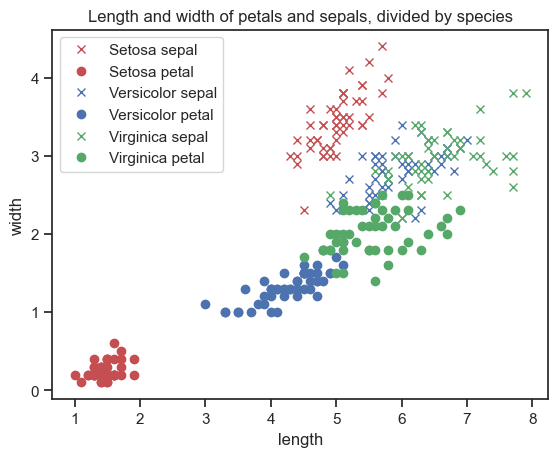

In [25]:
# Chart

# Setosa
plt.plot(x_setosa_sepal_length, y_setosa_sepal_width, "rx", label = "Setosa sepal")
plt.plot(x_setosa_petal_length, y_setosa_petal_width, "ro", label = "Setosa petal")

# Versicolor
plt.plot(x_Versicolor_sepal_length, y_Versicolor_sepal_width, "bx", label = "Versicolor sepal")
plt.plot(x_Versicolor_petal_length, y_Versicolor_petal_width, "bo", label = "Versicolor petal")

# Virginica
plt.plot(x_Virginica_sepal_length, y_Virginica_sepal_width, "gx", label = "Virginica sepal")
plt.plot(x_Virginica_petal_length, y_Virginica_petal_width, "go", label = "Virginica petal")

plt.title("Length and width of petals and sepals, divided by species")
plt.xlabel("length")
plt.ylabel("width")
plt.legend()

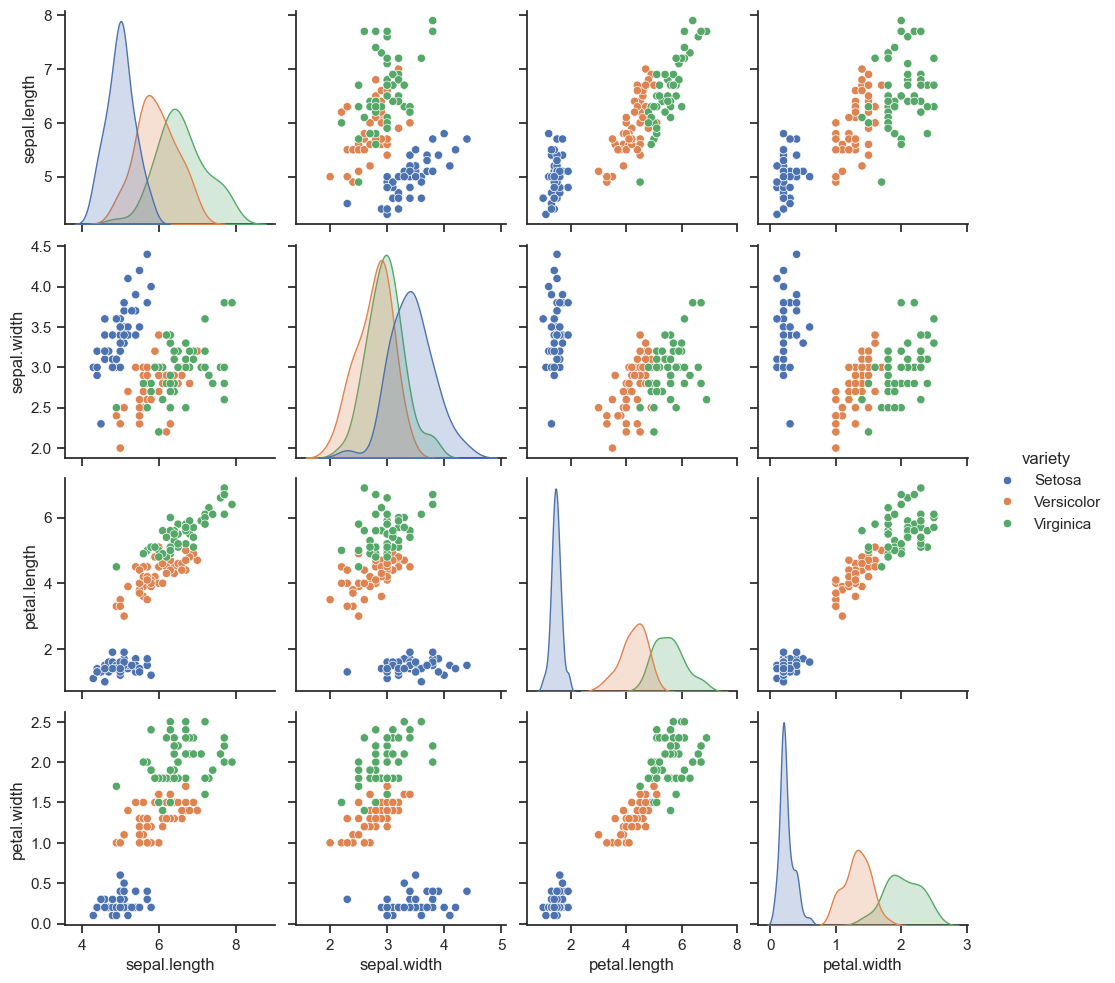

In [26]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris, hue="variety")

On the above charts, we can see that the length and width of the petal depend on the particular species.
So we try to create a model who recognize type of iris.

## Machine Learning Model

In [27]:
# Import library to split data
from sklearn.model_selection import train_test_split

In [28]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
# Split column "Variety"
y = iris.pop("variety")
y = list(y)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
# Split random data for training and testing
X_train, X_test, y_train, y_test  = train_test_split(iris, y, test_size=0.2)

In [102]:
# Import Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predicted = decision_tree.predict(X_test)

In [105]:
# Check corect score predict
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predicted)
score

0.9666666666666667

whe hawe a great score above 96% 

In [106]:
# Check for all data in iris database
decision_tree.predict(iris)

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

it's looks like good